# Statistics over labels distribution

{0: 385010425, 1: 4192020, 2: 23538904, 3: 48541862, 4: 27129749}


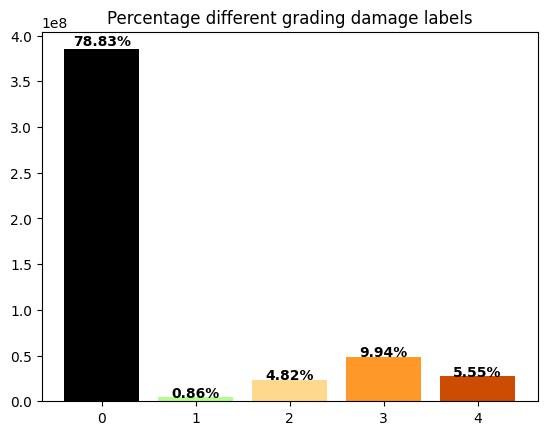

In [29]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

root_folder = "../../data/"
def count_values_in_tiff(path):
    img = np.array(Image.open(path))
    unique, counts = np.unique(img, return_counts=True)
    return dict(zip(unique, counts))

df = pd.read_csv("dataset/cross_validation/satelliteData_6folds.csv")
df = df[ (df["folder"] == "optimal") & (df["GRA"] == 1) & (df["pixelBurned"] > 0)]

tiff_paths = []
for i in range(len(df)):
    # get the file path and number from the dataframe
    emsr_folder_path = df.iloc[i]['folderPath']
    tiif_path = root_folder + emsr_folder_path + "/" + emsr_folder_path.split("/")[-1] + "_GRA.tif"
    if os.path.exists(tiif_path):
        tiff_paths.append(tiif_path)
    else:
        continue

batch_size = 50


value_counts = []
for path in tiff_paths:
    value_counts.append(count_values_in_tiff(path))

total_counts = {}
for count_dict in value_counts:
    for key, value in count_dict.items():
        if key in total_counts:
            total_counts[key] += value
        else:
            total_counts[key] = value

graph = plt.bar(total_counts.keys(), total_counts.values(), color=[(0,0,0),(181/256,254/256,142/256), (254/256,217/256,142/256), (254/256,153/256,41/256), (204/256,76/256,2/256)])
plt.title('Percentage different grading damage labels')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round((total_counts[i]/sum(total_counts.values()) * 100),2))+'%',
             ha='center',
             weight='bold')
    i+=1

plt.show()


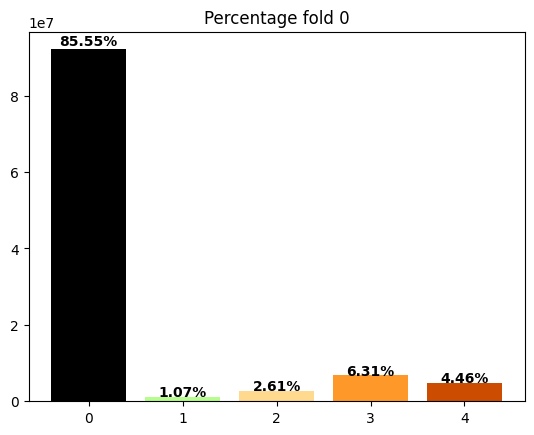

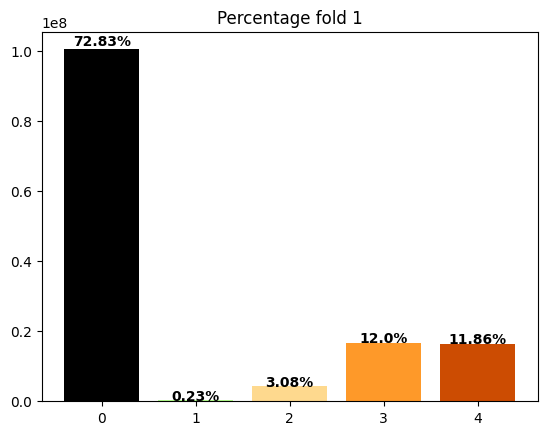

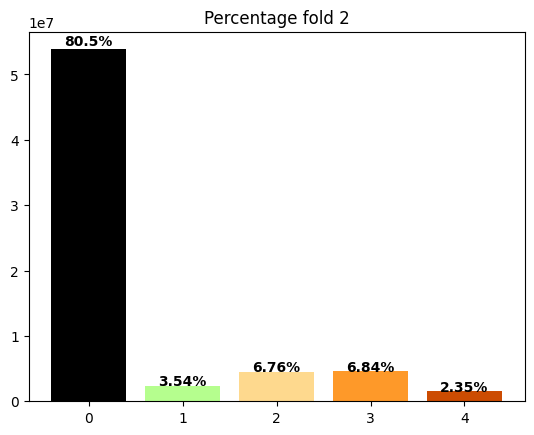

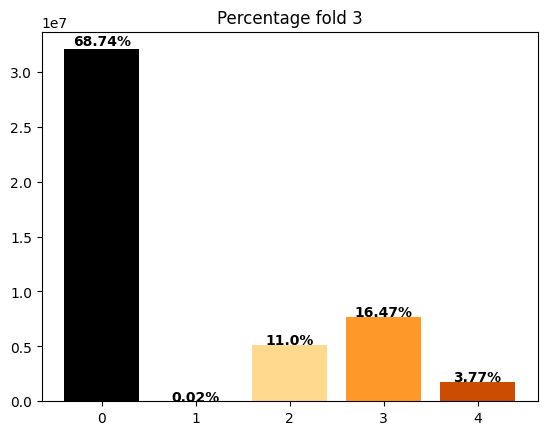

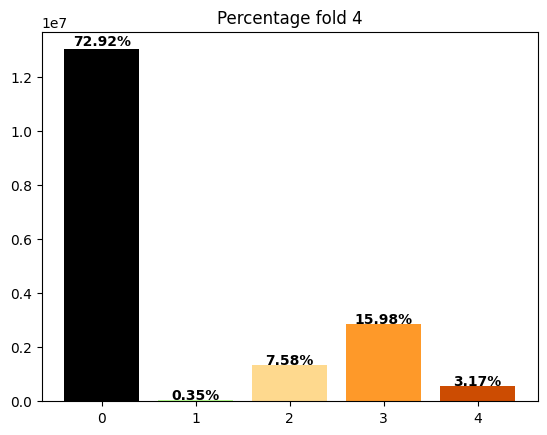

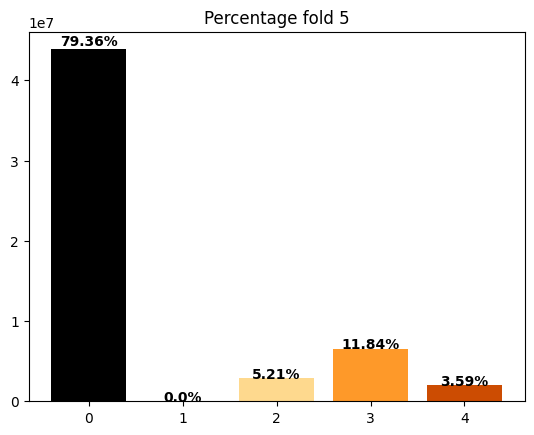

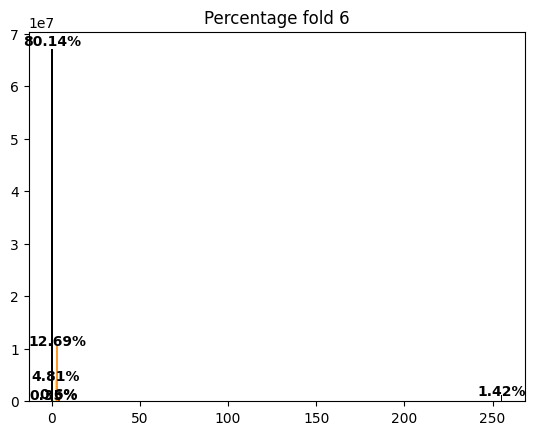

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def count_values_in_tiff(path):
    img = np.array(Image.open(path))
    unique, counts = np.unique(img, return_counts=True)
    return dict(zip(unique, counts))

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

root_folder = "../../data/"
def count_values_in_tiff(path):
    img = np.array(Image.open(path))
    unique, counts = np.unique(img, return_counts=True)
    dict_num = dict(zip(unique, counts))
    # if 1 in dict_num.keys():
        # if dict_num[1]:
            # print(path)
    # return dict(zip(unique[1:], counts[1:]))
    return dict(zip(unique, counts))

for fold in range(7):
    df = pd.read_csv("dataset/cross_validation/satelliteData_6folds_Severity.csv")
    df = df[ (df["folder"] == "optimal") & (df["GRA"] == 1) & (df["fold"] == fold)]
    
    if len(df) == 0:
        continue

    # for fold in UNIQUE
    tiff_paths = []
    for i in range(len(df)):
        # get the file path and number from the dataframe
        emsr_folder_path = df.iloc[i]['folderPath']
        tiif_path = root_folder + emsr_folder_path + "/" + emsr_folder_path.split("/")[-1] + "_GRA.tif"
        if os.path.exists(tiif_path):
            tiff_paths.append(tiif_path)
        else:
            continue

    batch_size = len(df)
    possible_keys = [0,1,2,3,4]
    # possible_keys = [1,2,3,4]
    colors = [(0,0,0), (181,254,142), (254,217,142), (254,153,41), (204,76,2)]

    for i in range(0, len(tiff_paths), batch_size):
        batch_paths = tiff_paths[i:i+batch_size]
        value_counts = []
        for path in batch_paths:
            value_counts.append(count_values_in_tiff(path))

        total_counts = {}
        for count_dict in value_counts:
            for key, value in count_dict.items():

                if key in total_counts:
                    total_counts[key] += value
                else:
                    total_counts[key] = value
            # print("------")
            for key in possible_keys:
                # print(count_dict.keys())
                if key not in count_dict.keys() and key not in total_counts.keys():
                    total_counts[key] = 0

        keys = sorted(list(total_counts.keys()))
        values = [total_counts[key] for key in keys]

        color_values = []
        for key in keys:
            if key in range(len(colors)):
                rgba = tuple([c/255 for c in colors[key]] + [1])
                color_values.append(rgba)
            else:
                color_values.append((0,0,0,1))

        graph = plt.bar(keys, values, color=color_values)

        i = 0
        for p in graph:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()        
            plt.text(x+width/2,
                    y+values[i]*1.01, #+ max(values)/100*99.9,
                    str(round((values[i]/sum(values) * 100),2))+'%',
                    ha='center',
                    weight='bold')
            i+=1
        plt.title(f"Percentage fold {fold}")
        plt.show()
